## Week 10

### Classification:

-Classification is a type of Supervised Machine Learning algorithm which is used to predict categorical output (label).

🟢Classification म्हणजे दिलेल्या input data ला specific class किंवा category मध्ये classify करणे.

📌 Example:


Now ML Model learns this pattern and predicts:

| Study Hours | Result |
| ----------- | ------ |
| 2           | Fail   |
| 4           | Fail   |
| 6           | Pass   |
| 8           | Pass   |

➡️ Pass or Fail

#### Types :

1. Binary Classification
2. Multi-Class Classification
3. Multi-Label Classification

#### 1. Binary Classification:

📌 Only Two Classes

Example:

Pass / Fail  
Spam / Not Spam  
Yes / No

🟢 Marathi:
Binary Classification मध्ये फक्त 2 output classes असतात.

Example:

| Input       | Output |
| ----------- | ------ |
| 3 hrs study | Fail   |
| 7 hrs study | Pass   |


#### Graph Representation:

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


Dataset

In [2]:
hours = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1)
result = np.array([0,0,0,0,1,1,1,1,1])


Train Model

In [3]:
model = LogisticRegression()
model.fit(hours,result)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

Prediction

In [4]:
pred = model.predict([[4.5]])
print(pred)


[1]


Graph Plot (Classification Boundary)

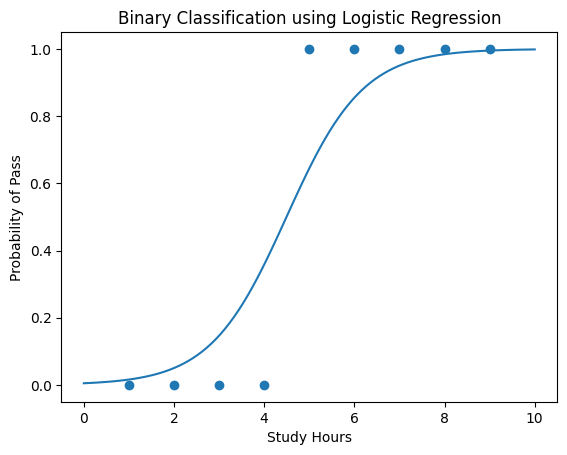

In [5]:
plt.scatter(hours,result)

x_test = np.linspace(0,10,100).reshape(-1,1)
y_prob = model.predict_proba(x_test)[:,1]

plt.plot(x_test,y_prob)

plt.xlabel("Study Hours")
plt.ylabel("Probability of Pass")
plt.title("Binary Classification using Logistic Regression")
plt.show()


.

#### Tebular form

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [7]:
data = {
    'Study_Hours':[2,3,4,5,6,7,8,9],
    'Sleep_Hours':[5,6,5,6,7,8,7,8],
    'Pass':[0,0,0,1,1,1,1,1]
}

df = pd.DataFrame(data)

print(df)


   Study_Hours  Sleep_Hours  Pass
0            2            5     0
1            3            6     0
2            4            5     0
3            5            6     1
4            6            7     1
5            7            8     1
6            8            7     1
7            9            8     1


In [8]:
X = df[['Study_Hours','Sleep_Hours']]
y = df['Pass']


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [10]:
model = LogisticRegression()
model.fit(X_train,y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [11]:
y_pred = model.predict(X_test)
print("Prediction:",y_pred)


Prediction: [1 1]


In [12]:
print("Accuracy:",accuracy_score(y_test,y_pred))


Accuracy: 1.0


In [13]:
new_data = [[6,7]]
result = model.predict(new_data)

print("Pass(1) / Fail(0):",result)


Pass(1) / Fail(0): [1]


C:\Users\jadha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### 2.Multi-class Classification:

📌 More than Two Classes

Example:

Grade A  
Grade B  
Grade C

🟢 Multi-Class Classification मध्ये 2 पेक्षा जास्त classes असतात.

#### Tebular form


In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [38]:
data = {
    'Study_Hours':[2,3,4,5,6,7,8,9],
    'Attendance':[60,65,70,75,80,85,90,95],
    'Grade':['0-c','0-c','1-b','1-b','1-b','2-a','2-a','2-a']
}

df = pd.DataFrame(data)

print(df)



   Study_Hours  Attendance Grade
0            2          60   0-c
1            3          65   0-c
2            4          70   1-b
3            5          75   1-b
4            6          80   1-b
5            7          85   2-a
6            8          90   2-a
7            9          95   2-a


In [20]:
X = df[['Study_Hours','Attendance']]
y = df['Grade']


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [24]:
model = LogisticRegression()
model.fit(X_train,y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [25]:
y_pred = model.predict(X_test)
print("Prediction:",y_pred)


Prediction: [0 2]


In [33]:
print("Accuracy:",accuracy_score(y_test,y_pred))


Accuracy: 0.0


In [39]:
new_data = [[6,80]]
result = model.predict(new_data)

print("Predicted Grade: ",result)


Predicted Grade:  [2]


C:\Users\jadha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### 3.Multi-Label Classification:

📌 One input → Multiple outputs

Example:

Movie Classification:

Action  
Comedy  
Horror

Movie can belong to:  
✔ Action + Comedy  
✔ Comedy + Horror

🟢 एका input साठी multiple output labels मिळू शकतात

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [41]:
data = {
    'Duration':[120,90,150,110,130,140],
    'Budget':[50,30,80,40,60,70],
    'Action':[1,0,1,0,1,1],
    'Comedy':[0,1,1,1,0,1],
    'Romance':[1,1,0,0,1,0]
}

df = pd.DataFrame(data)
print(df)


   Duration  Budget  Action  Comedy  Romance
0       120      50       1       0        1
1        90      30       0       1        1
2       150      80       1       1        0
3       110      40       0       1        0
4       130      60       1       0        1
5       140      70       1       1        0


In [42]:
X = df[['Duration','Budget']]
y = df[['Action','Comedy','Romance']]


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [44]:
model = MultiOutputClassifier(LogisticRegression())
model.fit(X_train,y_train)


,estimator estimator: estimator objectAn estimator object implementing :term:`fit` and :term:`predict`.A :term:`predict_proba` method will be exposed only if `estimator` implementsit.,LogisticRegression()
,"n_jobs n_jobs: int or None, optional (default=None)The number of jobs to run in parallel.:meth:`fit`, :meth:`predict` and :meth:`partial_fit` (if supportedby the passed estimator) will be parallelized for each target.When individual estimators are fast to train or predict,using ``n_jobs > 1`` can result in slower performance dueto the parallelism overhead.``None`` means `1` unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all available processes / threads.See :term:`Glossary ` for more details... versionchanged:: 0.20 `n_jobs` default changed from `1` to `None`.",None
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely propor

In [45]:
y_pred = model.predict(X_test)
print("Prediction:\n",y_pred)


Prediction:
 [[1 0 1]
 [1 0 1]]


In [46]:
print("Accuracy:",accuracy_score(y_test,y_pred))


Accuracy: 0.0


In [47]:
new_movie = [[135,65]]

result = model.predict(new_movie)

print("Action Comedy Romance:\n",result)


Action Comedy Romance:
 [[1 0 1]]


C:\Users\jadha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\jadha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\jadha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


.

### Logistic Regression:

-Logistic Regression is a Supervised Machine Learning Classification Algorithm used to predict categorical output (Yes/No, 0/1, True/False).

👉 Linear Regression gives continuous output  
👉 Logistic Regression gives discrete output (class label)

📌 Example:

Email is Spam or Not Spam  
Student Pass or Fail  
Disease Positive or Negative

🔹 Why not Linear Regression for Classification?

Linear Regression output range = (-∞ to +∞)  
But in classification, we need output in [0,1] probability range

🔸 Sigmoid Function (Logistic Function)

    σ(z) = 1 / 1+e−z​

Where

    z= b0 + b1x1 + b2x2 + ... + bnxn

This converts output into probability between 0 and 1

#### 🔹 Types of Logistic Regression

| Type                            | Output Classes      |
| ------------------------------- | ------------------- |
| Binary Logistic Regression      | 2 Classes (0/1)     |
| Multinomial Logistic Regression | More than 2 Classes |
| Ordinal Logistic Regression     | Ordered Categories  |


#### 1️⃣ Binary Logistic Regression:

-Binary Logistic Regression is used when the output has only 2 classes.

👉 Output = 0 or 1  

👉 Example:

Pass / Fail  
Spam / Not Spam  
Yes / No

It predicts the probability of one class using the Sigmoid Function.

🧠 Marathi:

Binary logistic regression tevha use karto jevha output madhye fakta 2 categories astat.  
Model probability calculate karto ki data class 1 madhe yeil ki nahi.

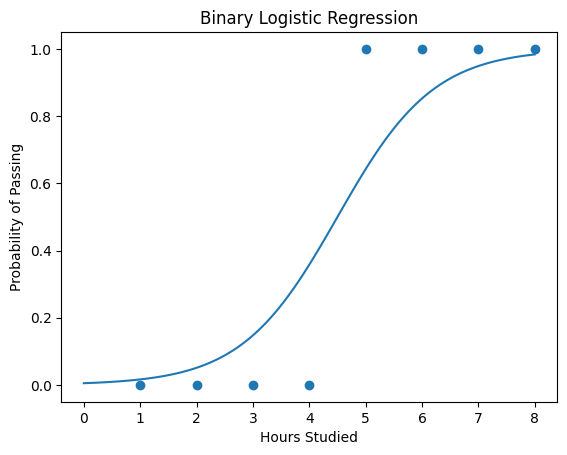

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Dataset (Hours studied vs Pass/Fail)
X = np.array([[1],[2],[3],[4],[5],[6],[7],[8]])
y = np.array([0,0,0,0,1,1,1,1])

# Model
model = LogisticRegression()
model.fit(X,y)

# Sigmoid Curve
X_range = np.linspace(0,8,100).reshape(-1,1) # Generate a range of hours from 0 to 10
prob = model.predict_proba(X_range)[:,1] # Get probability of passing (class 1)

plt.scatter(X,y)
plt.plot(X_range,prob)
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Binary Logistic Regression")
plt.show()

#### 2️⃣ Multinomial Logistic Regression

-Multinomial Logistic Regression is used when the output has more than 2 classes and no order between them.

👉 Output = 0, 1, 2, 3, ... 
 
👉 Example:

Fruit classification (Apple / Mango / Banana)  
Animal classification (Dog / Cat / Cow)  
Here, instead of sigmoid function we use:

🧠 Marathi:

-Multinomial logistic regression tevha use karto jevha 2 peksha jast classes astat ani tyanchyamadhe kahi order nasto.

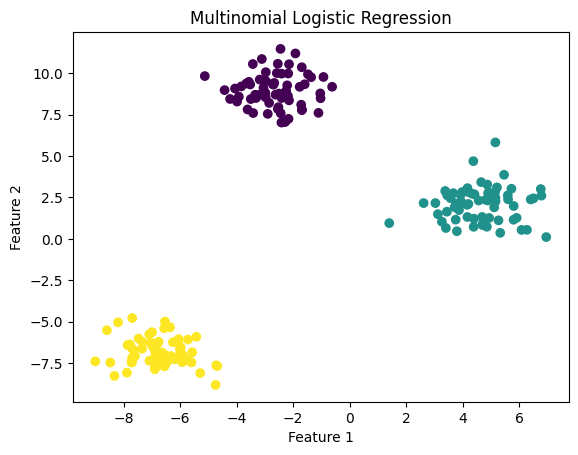

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Dataset with 3 classes
X,y = make_blobs(n_samples=200, centers=3, random_state=42) # Generate synthetic data with 3 centers (classes)

model = LogisticRegression()
model.fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y) # Color points by class 
plt.title("Multinomial Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### 3️⃣ Ordinal Logistic Regression:

Ordinal Logistic Regression is used when the output has more than 2 classes but in a specific order.

👉 Example:

Rating: Poor / Average / Good / Excellent  
Education Level: 10th / 12th / Graduate / Postgraduate

🧠 Marathi:

Ordinal logistic regression tevha use karto jevha output categories madhye order asto.

Example:

Low < Medium < High  
Poor < Good < Excellent

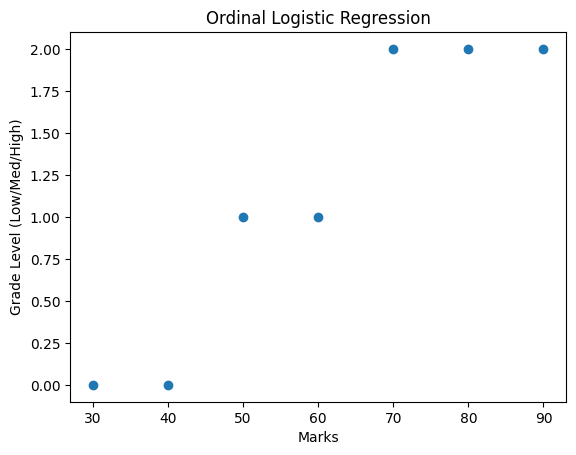

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Ordered Dataset (Marks vs Grade)
X = np.array([[30],[40],[50],[60],[70],[80],[90]])
y = np.array([0,0,1,1,2,2,2])   # 0=Low, 1=Medium, 2=High

model = LogisticRegression()
model.fit(X,y)

plt.scatter(X,y)
plt.xlabel("Marks")
plt.ylabel("Grade Level (Low/Med/High)")
plt.title("Ordinal Logistic Regression")
plt.show()

### 1. Confusion Matrix
### 2. Accuracy
### 3. Precision
### 4. Recall
### 5. F1 – Score

#### 1. Confusion Matrix:

Confusion Matrix is used to check performance of classification model.

👉 Model ne je predict kelay te Actual value shi compare karto.

📌 Structure:

| Actual / Predicted | YES | NO |
| ------------------ | --- | -- |
| YES                | TP  | FN |
| NO                 | FP  | TN |

##### ✔ TP (True Positive):

Model ne YES predict kelay  
Actual pan YES ahe

🧠 Example:

Student pass zala  
Model pan PASS predict karto

##### ✔ TN (True Negative):

Model ne NO predict kelay  
Actual pan NO ahe

🧠 Example:

Student fail zala  
Model pan FAIL predict karto

##### ✔ FP (False Positive):

Model ne YES predict kelay  
But actual NO ahe ❌

🧠 Example:

Student fail zala  
Pan model PASS predict karto

##### ✔ FN (False Negative):

Model ne NO predict kelay  
But actual YES ahe ❌

🧠 Example:

Student pass zala  
Pan model FAIL predict karto

#### 2. Accuracy

👉 Model chi overall correctness sangte.

    Accuracy = TP+TN+FP+FN / TP+TN
	​
🧠 Marathi :  
Total prediction madhun model ne kitke correct prediction kele te Accuracy madhe samajte.

#### 3. Precision

-Out of all the instances that the model predicted as YES, how many are actually YES?  
-Precision is the ratio of correctly predicted positive observations to the total predicted positives.

👉 Model ne jitke YES predict kele
Tyatle actual YES kitke ahet?

    Precision = TP+FP / TP

🧠 Use:  
Jeva False Positive avoid karayche astat

Example:
Spam Email Detection
Normal mail la spam banvaycha nahi.

#### 4. Recall

-Out of all the actual YES cases, how many did the model correctly predict as YES?  
-Recall is the ratio of correctly predicted positive observations to all actual positives.

👉 Actual YES madhun  
Model ne kitke correct YES predict kele?

	Recall = TP+FN / TP

🧠 Use:  
Jeva False Negative avoid karayche astat

Example:
Disease Detection
Patient la disease ahe pan model NO bolu naye❗

5. F1 – Score

-F1 Score is the balance between Precision and Recall.  
-F1 Score measures the balance between Precision and Recall.

👉 Precision ani Recall cha balance measure

    F1 = 2 × Precision+Recall / Precision×Recall​


🧠 Marathi :  

F1 Score check karto ki,  
👉 Model cha Precision ani Recall donhi balanced ahet ka?

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
X = np.array([[1],[2],[3],[4],[5],[6],[7],[8]])
y = np.array([0,0,0,0,1,1,1,1])

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
model = LogisticRegression()
model.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [14]:
y_pred = model.predict(X_test)

In [ ]:
## confusion matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1 0]
 [0 1]]


In [ ]:
## Accuracy, Precision, Recall, F1 Score

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


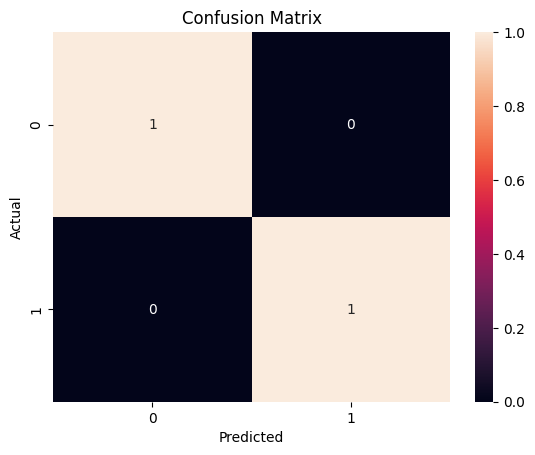

In [18]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()